<a href="https://colab.research.google.com/github/Chan0226/CNN/blob/main/%EB%93%9C%EB%9E%8D%EC%95%84%EC%9B%83%EC%9D%98_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81_%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

In [ ]:
(x_train,y_train),(x_test,y_test) =  cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 10s 0us/step


In [ ]:
# 교차검증을 위한 하이퍼 매개변수
batch_size = 128
n_epoch = 10
k = 3

In [ ]:
# 드랍아웃의 비율에 따라서 교차검증을 하는 함수
def cross_validation(dropoutRate):
  acurracy = []
  for train_index, val_index in  KFold(k).split(x_train):
    # 훈련 집합 검증 집합
    xtrain,xval = x_train[train_index], x_train[val_index]
    ytrain,yval = y_train[train_index], y_train[val_index]

    # 신경망 모델 설계  C C P D  C C P D FC D FC
    cnn = Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3) ))
    cnn.add(Conv2D(32,(3,3),activation='relu' ))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropoutRate[0]))

    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu' ))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropoutRate[1]))

    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropoutRate[2]))
    cnn.add(Dense(10,activation='softmax'))  # 이진 분류 sigmoid

    # 학습
    # 신경망 모델 학습(영상 증대기 활용)
    cnn.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])        
    cnn.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,
                            validation_data = (x_test,y_test), verbose=2)
    acurracy.append(cnn.evaluate(xval,yval,verbose=0)[1] )
  return acurracy


In [ ]:
# 드롭아웃의 비율을 달리변경하면서 신경망을평가
withOutDropout =  cross_validation([0.0,0.0,0.0])
withDropout =  cross_validation([0.25,0.25,0.5])

Epoch 1/10
391/391 - 8s - loss: 1.5425 - accuracy: 0.4401 - val_loss: 1.2385 - val_accuracy: 0.5567 - 8s/epoch - 20ms/step
Epoch 2/10
391/391 - 7s - loss: 1.1371 - accuracy: 0.5956 - val_loss: 1.0325 - val_accuracy: 0.6339 - 7s/epoch - 17ms/step
Epoch 3/10
391/391 - 7s - loss: 0.9284 - accuracy: 0.6761 - val_loss: 0.9361 - val_accuracy: 0.6755 - 7s/epoch - 17ms/step
Epoch 4/10
391/391 - 7s - loss: 0.7957 - accuracy: 0.7224 - val_loss: 0.8572 - val_accuracy: 0.7050 - 7s/epoch - 17ms/step
Epoch 5/10
391/391 - 6s - loss: 0.6791 - accuracy: 0.7635 - val_loss: 0.7821 - val_accuracy: 0.7296 - 6s/epoch - 16ms/step
Epoch 6/10
391/391 - 6s - loss: 0.5760 - accuracy: 0.8006 - val_loss: 0.7627 - val_accuracy: 0.7375 - 6s/epoch - 16ms/step
Epoch 7/10
391/391 - 7s - loss: 0.4917 - accuracy: 0.8272 - val_loss: 0.7566 - val_accuracy: 0.7455 - 7s/epoch - 17ms/step
Epoch 8/10
391/391 - 6s - loss: 0.4040 - accuracy: 0.8583 - val_loss: 0.7965 - val_accuracy: 0.7447 - 6s/epoch - 16ms/step
Epoch 9/10
391/3

In [ ]:
print("without dropout", np.array(withOutDropout).mean() )
print("with dropout", np.array(withDropout).mean() )

without dropout 0.9373002052307129
with dropout 0.8378401398658752


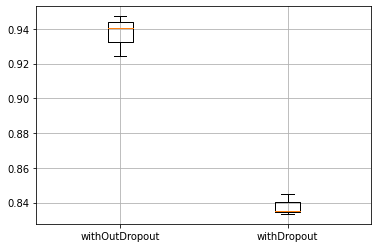

In [ ]:
# 박스 플롯
plt.boxplot([withOutDropout,withDropout], labels = ['withOutDropout','withDropout'])
plt.grid()
